In [50]:
from bs4 import BeautifulSoup
import requests
import urllib
import json
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import seaborn as sns 
import glob
from skimage.io import imread
import numpy as np
from skimage.transform import resize
from sklearn.feature_selection import SelectKBest, f_classif
from GIST import GIST
from skimage.feature import hog

path="/home/uriel/itam/semestre1/mineria_y_analisis_de_datos/wikiart/"

### Web scraping

In [2]:
def scrape(url):
    req = requests.get(url)
    return url, req.text

In [3]:
pagina="https://www.wikiart.org"

In [4]:
soup=BeautifulSoup(scrape(pagina+"/en/paintings-by-style")[1])

In [5]:
styles=soup.find_all('ul',{"class":"dictionaries-list"})[0]
styles=styles.find_all('li')

In [6]:
current_style=''
pager_links=[]
styles_links=[]
for li in range(len(styles)):
    if styles[li].find_all("a",href=True)==[]:
        current_style=styles[li].text.strip()
    else:
        pager_links.append(styles[li].find_all("a",href=True)[0]["href"])
        styles_links.append(current_style)

In [7]:
soup_images= [BeautifulSoup(scrape(pagina+x)[1]) for x in pager_links]

In [9]:
images_links = [x.find_all('main') for x in soup_images]

In [10]:
images_substyle = [x.find_all('h1')[0].text.strip() if len(x.find_all('h1'))>0 else "" for x in soup_images]

In [11]:
links=["https:"+str(x[0]).split("\n")[3].split(",")[1].split(":")[2][:-2] if len(x)>0 else "" for x in images_links]

In [12]:
diccionario_wikiarts=[]
for i,link in enumerate(links):
    if link!='':
        open_link = urllib.request.urlopen(link)
        archivo = json.loads(open_link.read())
        archivo["style"]=styles_links[i]
        archivo["substyle"]=images_substyle[i]
        diccionario_wikiarts.append(archivo)

In [13]:
#pd.to_pickle(diccionario_wikiarts,"dict_wikiarts.pkl")

In [14]:
suma=0
for i in diccionario_wikiarts:
    imagenes=i["Paintings"]
    for j in  imagenes:
        imagen=j["image"]
        suma=suma+1
print(suma)

10147


### EDA

In [25]:
infile=open(path+'dict_wikiarts.pkl', 'rb')

In [26]:
new_dict=pickle.load(infile)
infile.close()

In [27]:
new_dict[0]

{'ArtistsHtml': None,
 'CanLoadMoreArtists': False,
 'Paintings': [{'id': '5dea9d1bedc2c91fccabcd13',
   'title': 'Narmer Palette',
   'year': '3050 BC',
   'width': 2566,
   'height': 1808,
   'artistName': 'Ancient Egypt',
   'image': 'https://uploads3.wikiart.org/00265/images/ancient-egyptian-painting/narmer-palette.jpg',
   'map': '01234567*',
   'paintingUrl': '/en/ancient-egyptian-painting/narmer-palette--3050',
   'artistUrl': '/en/ancient-egyptian-painting',
   'albums': None,
   'flags': 2,
   'images': None},
  {'id': '5d2480a0edc2c924d8d1e05f',
   'title': 'Box Inlay with a Geometric Pattern',
   'year': '3100-2900 BC',
   'width': 1200,
   'height': 560,
   'artistName': 'Ancient Egypt',
   'image': 'https://uploads2.wikiart.org/00244/images/ancient-egyptian-painting/box-inlay-with-a-geometric-pattern-ca-3100-2900-b-c.jpg',
   'map': '0123**67*',
   'paintingUrl': '/en/ancient-egyptian-painting/box-inlay-with-a-geometric-pattern--2900',
   'artistUrl': '/en/ancient-egyptian

In [28]:
Paintings = list(map(lambda x : x['Paintings'], new_dict))
Styles = list(map(lambda x : x['style'], new_dict))
Substyles = list(map(lambda x : x['substyle'], new_dict))

In [29]:
type(Paintings)

list

In [30]:
len(Paintings)

217

In [31]:
Title=[]
Style=[]
Substyle=[]
ID=[]
n=0
np=0

In [32]:
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Title.append(Paintings[i][np]['title'])
        Style.append(Styles[i])
        Substyle.append(Substyles[i])
        ID.append(Paintings[i][np]['id'])
        np+=1

In [33]:
len(Title)

10144

In [34]:
Year=[]
Image_URL=[]
Artist_Name=[]

In [35]:
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Year.append(Paintings[i][np]['year'])
        np+=1
        
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Image_URL.append(Paintings[i][np]['image'])
        np+=1

for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Artist_Name.append(Paintings[i][np]['artistName'])
        np+=1

In [36]:
len(Year)

10144

In [37]:
len(Image_URL)

10144

In [38]:
len(Artist_Name)

10144

In [39]:
Art = pd.DataFrame({'Title':Title, 'Artist Name':Artist_Name, 'Year':Year, 'Image URL':Image_URL,
                   "Style":Style,"Substyle":Substyle,"ID":ID})

In [166]:
ArtistName = (Art.groupby('Artist Name').count()).sort_values(by='Title', ascending = False)

In [167]:
ArtistName.head(50)

,Title,Year,Image URL,Style,Substyle,ID
Artist Name,,,,,,
Byzantine Mosaics,294,294,294,294,294,294
Orthodox Icons,218,218,218,218,218,218
Kazimir Malevich,158,158,158,158,158,158
Ancient Egypt,109,109,109,109,109,109
Alfred Freddy Krupa,103,103,103,103,103,103
Paul Cezanne,94,94,94,94,94,94
Georges Seurat,91,91,91,91,91,91
Giorgio de Chirico,86,86,86,86,86,86
Ancient Greek Painting and Sculpture,71,71,71,71,71,71


In [168]:
url= 'https://www.wikiart.org/en/paintings-by-genre?sortby=1'

In [169]:
page = requests.get(url)

In [170]:
soup = BeautifulSoup(page.content, 'html.parser')

In [171]:
art_type= soup.find_all('li', class_= 'dottedItem')

In [172]:
arts=list()
numbers=[]
n=0

for i in art_type:
    arts.append(i.text)


for i in arts:
    arts[n]=arts[n].strip('\n')
    for e in i.split():
        if e.isdigit():
            numbers.append(int(e))
        else:
            e = e.capitalize()
            arts[n]= e    
    n+=1
    


In [173]:
Type_arts=pd.DataFrame({'Art':arts, 'Number of images':numbers})

In [174]:
a = Type_arts[Type_arts['Number of images']>7000]

<AxesSubplot:xlabel='Number of images', ylabel='Art'>

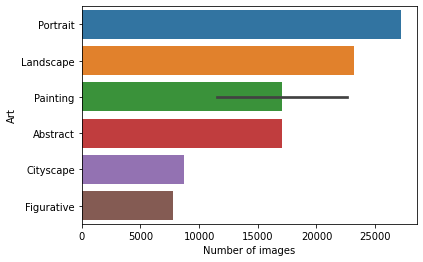

In [175]:
sns.barplot(data=a, y='Art', x='Number of images')

In [176]:
Type_arts.head(20)

,Art,Number of images
0,Portrait,27177
1,Landscape,23193
2,Painting,22637
3,Abstract,17028
4,Painting,11485
5,Cityscape,8668
6,Figurative,7763
7,Study,6972
8,Illustration,6363
9,Life,4610


### Estilos y subestilos

In [177]:
Art[["Style","Image URL"]].groupby(["Style"]).agg({"Image URL":"count"}).sort_values(by="Image URL",ascending=False)

,Image URL
Style,
Modern Art,4806
Contemporary Art,1815
Western Medieval Art,984
Western Post Renaissance Art,781
Japanese Art,479
Western Renaissance Art,330
Islamic Art,231
Ancient Greek Art,172
Dictionaries with no category,137


In [178]:
Art[["Style","Substyle","Image URL"]].groupby(["Style","Substyle"]).agg({"Image URL":"count"}).sort_values(by="Image URL",ascending=False)

Image URL
Style                        Substyle                                                     
Modern Art                   Kinetic Art                                                60
Western Medieval Art         Late Byzantine/Palaeologan Renaissance (c. 1261...         60
Modern Art                   Figurative Expressionism                                   60
                             Futurism                                                   60
                             Hard Edge Painting                                         60
...                                                                                    ...
Western Medieval Art         Early Christian                                             1
Contemporary Art             Graffiti Art                                                1
Western Post Renaissance Art Stroganov school of icon painting                           1
Ancient Egyptian Art         Old Kingdom                                                 1
                             2nd Intermediate Period                                     1

[217 rows x 1 columns]

In [179]:
tabla1=Art[["Style","Substyle","Image URL"]].groupby(["Style","Substyle"]).agg({"Image URL":"count"}).reset_index()
tabla2=tabla1[["Style","Substyle","Image URL"]].groupby(["Style"]).agg({"Substyle":"count","Image URL":"sum"}).sort_values(by="Substyle",ascending=False)
tabla2

,Substyle,Image URL
Style,,
Modern Art,91,4806
Contemporary Art,38,1815
Western Medieval Art,28,984
Western Post Renaissance Art,14,781
Japanese Art,10,479
Ancient Egyptian Art,9,109
Islamic Art,7,231
Western Renaissance Art,6,330
Ancient Greek Art,4,172


In [40]:
muestra=Art[Art["Style"]=="Western Renaissance Art"].reset_index(drop=True)
muestra

,Title,Artist Name,Year,Image URL,Style,Substyle,ID
0,Crevole Madonna,Duccio,1280,https://uploads1.wikiart.org/images/duccio/cre...,Western Renaissance Art,Proto Renaissance,5772793eedc2cb3880da9b0c
1,Madonna and Child (no. 593),Duccio,1280,https://uploads1.wikiart.org/images/duccio/mad...,Western Renaissance Art,Proto Renaissance,5772793fedc2cb3880da9ccc
2,Maest&#224;,Duccio,1280,https://uploads1.wikiart.org/images/duccio/mae...,Western Renaissance Art,Proto Renaissance,57727940edc2cb3880da9e8c
3,Madonna and Child,Duccio,1281,https://uploads3.wikiart.org/images/duccio/mad...,Western Renaissance Art,Proto Renaissance,5772793fedc2cb3880da9c8c
4,Madonna of Crevole,Duccio,1283-1284,https://uploads0.wikiart.org/images/duccio/mad...,Western Renaissance Art,Proto Renaissance,57727940edc2cb3880da9e4c
...,...,...,...,...,...,...,...
325,Ascension,Kmetty J&#225;nos,1913,https://uploads2.wikiart.org/00159/images/kmet...,Western Renaissance Art,Renaissance,5a12301cedc2c968dc9bee0e
326,Kosenbi,Fujishima Takeji,1927,https://uploads1.wikiart.org/00290/images/fuji...,Western Renaissance Art,Renaissance,5ec915fbedc2c9e1a456efc9
327,"Portrait of Perugino, After Raphael",Fujishima Takeji,XIX-XX cent.,https://uploads6.wikiart.org/00290/images/fuji...,Western Renaissance Art,Renaissance,5ec91628edc2c9e1a45826cf
328,Profile of a Woman,Fujishima Takeji,XIX-XX cent.,https://uploads4.wikiart.org/00290/images/fuji...,Western Renaissance Art,Renaissance,5ec9162aedc2c9e1a458327a


In [181]:
#for i in diccionario_wikiarts:
#    imagenes=i["Paintings"]
#    for j in  imagenes:
#        imagen=j["image"]
#        id_=j["id"]
#        obtener = requests.get(imagen,stream=True)
#        with open("/home/uriel/itam/semestre1/mineria_y_analisis_de_datos/wikiart/" + id_ +".jpg", 'wb') as imagen:
#            imagen.write(obtener.content)

In [182]:
for j in  range(muestra.shape[0]):
    imagen=muestra["Image URL"][j]
    id_=muestra["ID"][j]
    obtener = requests.get(imagen,stream=True)
    with open(path+"images/" + id_ +".jpg", 'wb') as imagen:
        imagen.write(obtener.content)

### Lectura de imágenes

In [4]:
image_names = glob.glob(path+'images/*.jpg')

In [184]:
len(image_names)

330

In [185]:
X =  [resize(imread(img_name,as_gray='True'), (128, 128)) for img_name in image_names]

In [193]:
X=np.array(X)

In [58]:
X.shape

(330, 128, 128)

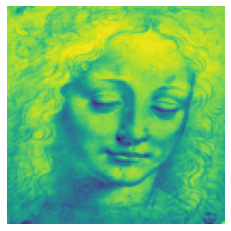

(128, 128)


In [59]:
i=2
plt.imshow(X[i])
plt.axis('off')
plt.show()
print(X[i].shape)

### Variables a utilizar

#### Sin ninguna transformación

In [63]:
X1 = X.reshape((330,-1))
X1.shape

(330, 16384)

In [65]:
print("Las 20 variables con mayor varianza son:")
pd.DataFrame(pd.DataFrame(X1).var()).rename(columns={0:"variable"}).sort_values(by=["variable"],ascending=False).head(20).index

Las 20 variables con mayor varianza son:


Int64Index([ 896, 1024,  768,   28,  114,  115,  640,   26,  113, 1408,  116,
             130,   29,  128,   27,   25,  131, 1280, 1152,   10],
           dtype='int64')

In [41]:
nombres=[x.split("/")[-1][:-4] for x in image_names]

In [42]:
tabla1=pd.DataFrame(nombres).rename(columns={0:"id"}).merge(muestra,left_on="id",right_on="ID",how="left")

In [46]:
tabla1["Substyle"].value_counts()

Proto Renaissance               60
Northern Renaissance            60
High Renaissance                60
Early Renaissance               60
Mannerism (Late Renaissance)    60
Renaissance                     30
Name: Substyle, dtype: int64

In [66]:
kb = SelectKBest(k=20, score_func=f_classif)
kb.fit_transform(pd.DataFrame(X1),tabla1["Substyle"])
print("Las 20 mejores variables con ANOVA son:")
print(pd.DataFrame(X1).columns[kb.get_support()])

Las 20 mejores variables con ANOVA son:
Int64Index([12150, 12278, 12662, 12790, 12918, 13710, 13711, 13951, 13965,
            14079, 14207, 14463, 14724, 16259, 16260, 16262, 16263, 16264,
            16342, 16343],
           dtype='int64')


#### Usando GIST

In [11]:
param = {"orientationsPerScale":np.array([8, 8, 8, 8]),
         "numberBlocks":[4, 4],
         "fc_prefilt":10,
         "boundaryExtension":32
}

gist = GIST(param)

In [13]:
X_gist = np.array([gist._gist_extract(x) for x in X])

In [16]:
X_gist.shape

(330, 512)

(192, 192, 32)


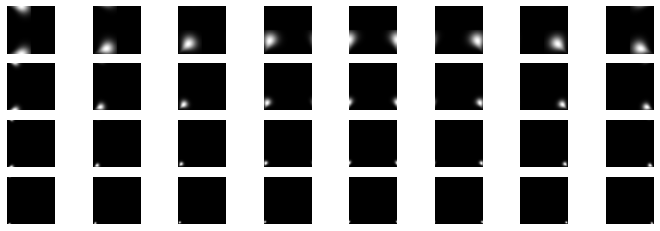

In [74]:
i=2

# In case you want to see the filters
filters = gist._more_config(X[i])
print(filters.shape)

# Show filters
plt.figure(figsize=(12, 4))
for i in range(32):
  plt.subplot(4, 8, i+1)
  plt.imshow(filters[:, :, i], cmap='gray')
  plt.axis('off')
plt.show()

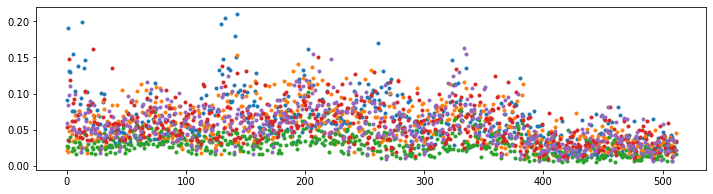

In [75]:
# See descriptors
n=5

plt.figure(figsize=(12, 3))
plt.plot(X_gist[0:n,].T, '.')
plt.show()

In [76]:
print("Las 20 variables con mayor varianza son:")
pd.DataFrame(pd.DataFrame(X_gist).var()).rename(columns={0:"variable"}).sort_values(by=["variable"],ascending=False).head(20).index

Las 20 variables con mayor varianza son:


Int64Index([142, 130, 129, 203, 270, 141, 134, 131, 143, 140, 199, 192, 257,
            138, 269, 128, 258, 331, 204, 327],
           dtype='int64')

In [77]:
kb = SelectKBest(k=20, score_func=f_classif)
kb.fit_transform(pd.DataFrame(X_gist),tabla1["Substyle"])
print("Las 20 mejores variables con ANOVA son:")
print(pd.DataFrame(X_gist).columns[kb.get_support()])

Las 20 mejores variables con ANOVA son:
Int64Index([  3,  47,  60,  76, 175, 188, 204, 283, 320, 332, 434, 448, 450,
            456, 460, 462, 466, 472, 476, 478],
           dtype='int64')


#### Usando HOG

In [88]:
i=2

IMG2_hog_desc, IMG2_hog_img = hog(X[i], orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True)

(128, 128)


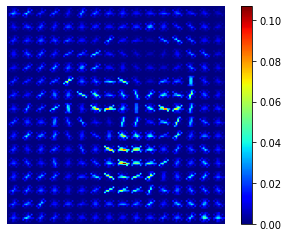

(8100,)


In [89]:
# Plot HOG image
print(IMG2_hog_img.shape)

plt.imshow(IMG2_hog_img, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

print(IMG2_hog_desc.shape)

In [81]:
X_hog = np.array([hog(x) for x in X])

In [82]:
X_hog.shape

(330, 15876)

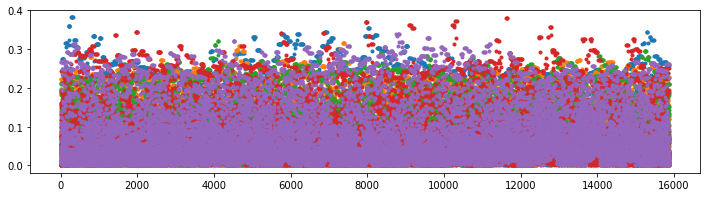

In [83]:
# See descriptors
n=5

plt.figure(figsize=(12, 3))
plt.plot(X_hog[0:n,].T, '.')
plt.show()

In [97]:
print("Las 20 variables con mayor varianza son:")
pd.DataFrame(pd.DataFrame(X_hog).var()).rename(columns={0:"variable"}).sort_values(by=["variable"],ascending=False).head(20).index

Las 20 variables con mayor varianza son:


Int64Index([   74,  1113,  2247,   236,   317,   166,   870,   175,  1208,
              994,    94,    85,   103,    76, 14962,  1289,   976, 14890,
               65,   184],
           dtype='int64')

In [98]:
kb = SelectKBest(k=20, score_func=f_classif)
kb.fit_transform(pd.DataFrame(X_hog),tabla1["Substyle"])
print("Las 20 mejores variables con ANOVA son:")
print(pd.DataFrame(X_hog).columns[kb.get_support()])

Las 20 mejores variables con ANOVA son:
Int64Index([  524,   596,   900,   972,   991,  1062,  1071,  1559,  1631,
             8582,  9689,  9761, 10796, 12501, 12528, 14769, 15295, 15367,
            15709, 15781],
           dtype='int64')


#### Usando GIST y HOG

In [110]:
X.shape

(330, 128, 128)

In [111]:
X_f1 = np.array([hog(x, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)[1] for x in X])

In [113]:
X_f1.shape

(330, 128, 128)

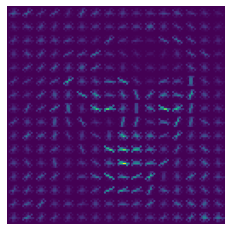

(128, 128)


In [112]:
i=2
plt.imshow(X_f1[i])
plt.axis('off')
plt.show()
print(X_f1[i].shape)

In [114]:
param = {"orientationsPerScale":np.array([8, 8, 8, 8]),
         "numberBlocks":[4, 4],
         "fc_prefilt":10,
         "boundaryExtension":32
}

gist = GIST(param)

In [115]:
X_f2 = np.array([gist._gist_extract(x) for x in X_f1])

In [116]:
X_f2.shape

(330, 512)

In [117]:
print("Las 20 variables con mayor varianza son:")
pd.DataFrame(pd.DataFrame(X_f2).var()).rename(columns={0:"variable"}).sort_values(by=["variable"],ascending=False).head(20).index

Las 20 variables con mayor varianza son:


Int64Index([140, 128, 192, 204, 136, 132, 143, 139, 135, 138, 131, 268, 142,
            141, 129, 134, 256, 205, 332,  64],
           dtype='int64')

In [118]:
kb = SelectKBest(k=20, score_func=f_classif)
kb.fit_transform(pd.DataFrame(X_f2),tabla1["Substyle"])
print("Las 20 mejores variables con ANOVA son:")
print(pd.DataFrame(X_f2).columns[kb.get_support()])

Las 20 mejores variables con ANOVA son:
Int64Index([ 15,  32,  62,  71,  75, 118, 140, 160, 236, 252, 258, 268, 303,
            370, 380, 398, 441, 452, 459, 460],
           dtype='int64')
